# Name: SARMAD HASSAN

## The Sparks Foundation: Data Science & Business Analytics Internship

### Task 1: Prediction using Supervised Machine Learning

**Predict the percentage of an student based on the no. of study hours.**

In [230]:
greetings = "Assalam-o-Alaikum!"
print(greetings)

Assalam-o-Alaikum!


**Import Libraries**

In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

**Import Dataset**

First Five Rows of Dataset

In [232]:
df = pd.read_csv("student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Statistical Analysis**

In [233]:
# Statistical Description
statistics = df.describe().reset_index()
statistics.columns = ["Statistics", "Hours", "Scores"]
statistics["Statistics"] = statistics["Statistics"].replace(["25%", "50%", "75%"], ["1st Quartile", "2nd Quartile", "3rd Quartile"])
statistics

,Statistics,Hours,Scores
0,count,25.000000,25.000000
1,mean,5.012000,51.480000
2,std,2.525094,25.286887
3,min,1.100000,17.000000
4,1st Quartile,2.700000,30.000000
5,2nd Quartile,4.800000,47.000000
6,3rd Quartile,7.400000,75.000000
7,max,9.200000,95.000000


In [234]:
# Quartiles
Quartiles = statistics.iloc[4:7, :].reset_index()
del Quartiles["index"]
Quartiles

,Statistics,Hours,Scores
0,1st Quartile,2.7,30.0
1,2nd Quartile,4.8,47.0
2,3rd Quartile,7.4,75.0


In [235]:
# Inter Quartile Range
IQR = pd.DataFrame({"Statistics": ["IQR"],
                    "Hours": [Quartiles["Hours"][2] - Quartiles["Hours"][0]],
                    "Scores": [Quartiles["Scores"][2] - Quartiles["Scores"][0]]})
IQR

,Statistics,Hours,Scores
0,IQR,4.7,45.0


In [236]:
# Concatenation
Quartiles = pd.concat([Quartiles, IQR])
Quartiles

,Statistics,Hours,Scores
0,1st Quartile,2.7,30.0
1,2nd Quartile,4.8,47.0
2,3rd Quartile,7.4,75.0
0,IQR,4.7,45.0


**Barplot**

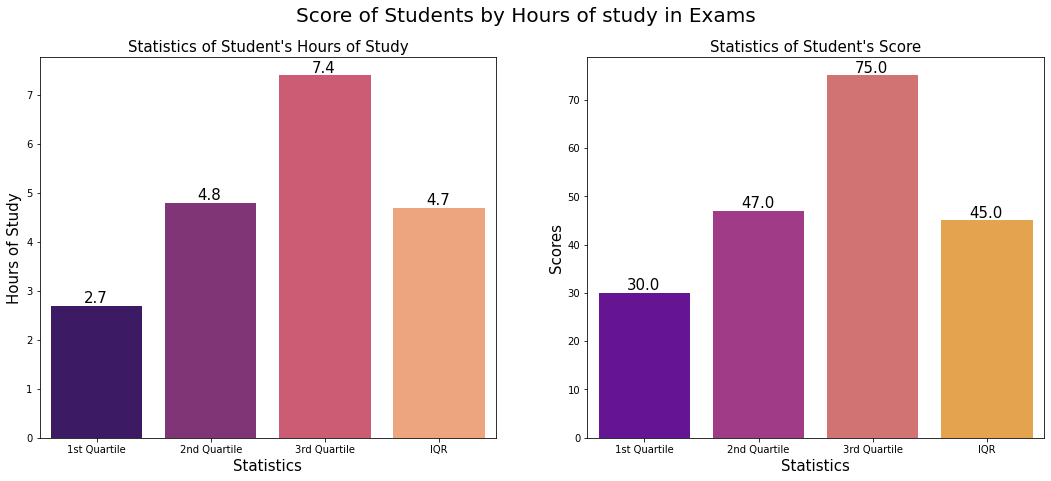

In [237]:
fig, axes = plt.subplots(1, 2, figsize = (18, 7))
fig.suptitle("Score of Students by Hours of study in Exams", fontsize = 20)

# Hours Graph
graph = sns.barplot(ax = axes[0], x = "Statistics", y = "Hours", data = Quartiles, palette = "magma")
for p in graph.patches:
        graph.annotate('{:.01f}'.format(p.get_height()), 
                      (p.get_x()+0.39, p.get_height()),
                       ha='center', va='bottom',color= 'black', fontsize = 15)
axes[0].set_title("Statistics of Student's Hours of Study", size = 15)
axes[0].set_xlabel("Statistics", size = 15)
axes[0].set_ylabel("Hours of Study", size = 15)

# Score Graph
g = sns.barplot(ax = axes[1], x = "Statistics", y = "Scores", data = Quartiles, palette = "plasma")
for p in g.patches:
        g.annotate('{:.01f}'.format(p.get_height()), 
                      (p.get_x()+0.39, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
axes[1].set_title("Statistics of Student's Score", size = 15)
axes[1].set_xlabel("Statistics", size = 15)
axes[1].set_ylabel("Scores", size = 15)

plt.show()

In [238]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [239]:
# Data Shape
df.shape

(25, 2)

In [240]:
# Data Types
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [241]:
# Total Rows
df.count()

Hours     25
Scores    25
dtype: int64

**Scatter Plot**

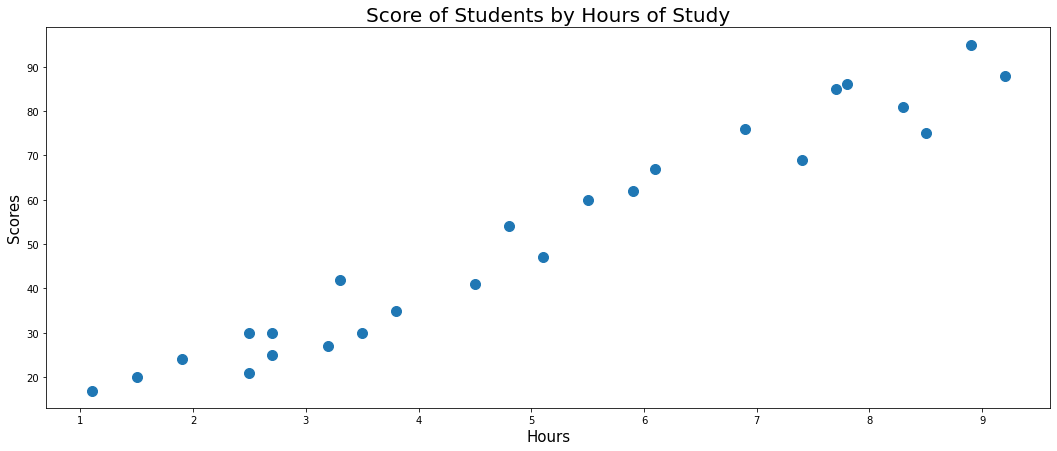

In [242]:
# Scatter Plot
plt.figure(figsize = (18, 7))
plt.scatter(x = "Hours", y = "Scores", data = df, s = 100)
plt.title("Score of Students by Hours of Study", size = 20)
plt.xlabel("Hours", size = 15)
plt.ylabel("Scores", size = 15)
plt.show()

**Box Plots**

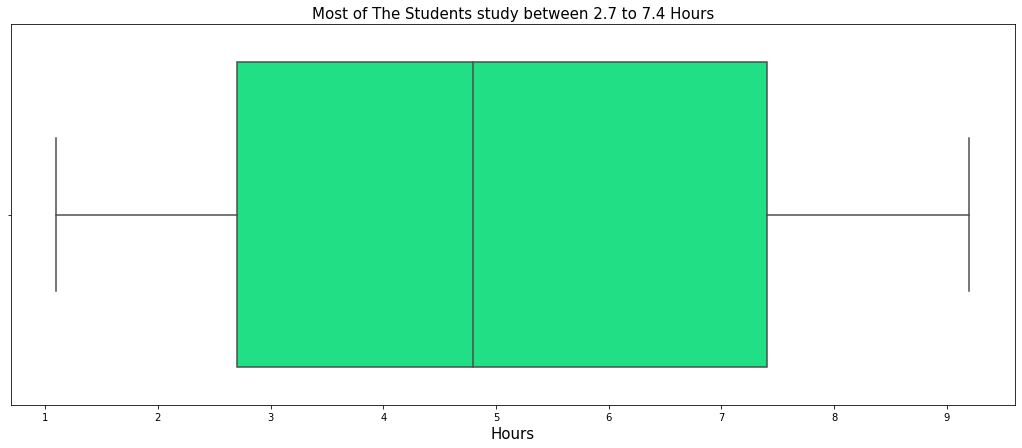

In [243]:
# Hours
plt.figure(figsize = (18, 7))
sns.boxplot(x = df["Hours"], palette = "gist_rainbow_r")
plt.title("Most of The Students study between 2.7 to 7.4 Hours", size = 15)
plt.xlabel("Hours", size = 15)
plt.show()

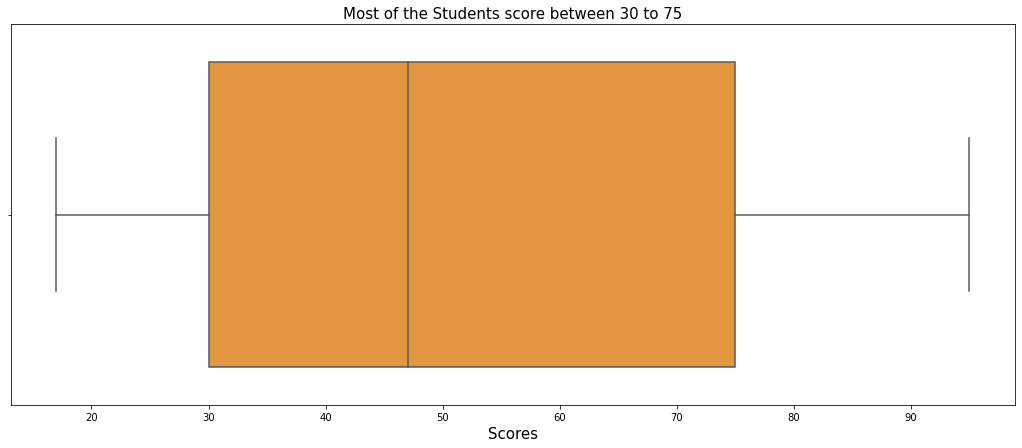

In [244]:
# Scores
plt.figure(figsize = (18, 7))
sns.boxplot(x = df["Scores"], palette = "YlOrBr")
plt.title("Most of the Students score between 30 to 75", size = 15)
plt.xlabel("Scores", size = 15)
plt.show()

**Histogram**

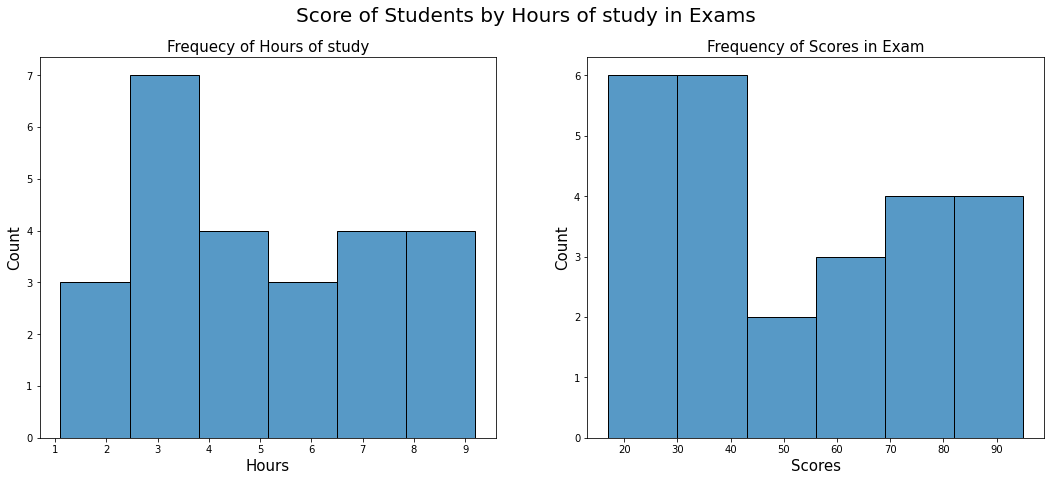

In [245]:
# Histogram of Exam Scores and Study Hours
# Histogram of Exam Scores and Study Hours
fig, axes = plt.subplots(1, 2, figsize = (18, 7))
fig.suptitle("Score of Students by Hours of study in Exams", fontsize = 20)

sns.histplot(ax = axes[0], data = df, x = "Hours")
axes[0].set_title("Frequecy of Hours of study", size = 15)
axes[0].set_xlabel("Hours", size = 15)
axes[0].set_ylabel("Count", size = 15)

sns.histplot(ax = axes[1], data = df, x = "Scores")
axes[1].set_title("Frequency of Scores in Exam", size = 15)
axes[1].set_xlabel("Scores", size = 15)
axes[1].set_ylabel("Count", size = 15)
plt.show()

**Pass and Fail Students**

In [246]:
# Pass: Score > 50
df["Status"] = df["Scores"] > 50
df

,Hours,Scores,Status
0,2.5,21,False
1,5.1,47,False
2,3.2,27,False
3,8.5,75,True
4,3.5,30,False
5,1.5,20,False
6,9.2,88,True
7,5.5,60,True
8,8.3,81,True
9,2.7,25,False


In [247]:
# Replace True False with Pass Fail
df["Status"] = df["Status"].replace([True, False], ["Pass", "Fail"])
df.head()

,Hours,Scores,Status
0,2.5,21,Fail
1,5.1,47,Fail
2,3.2,27,Fail
3,8.5,75,Pass
4,3.5,30,Fail


In [248]:
# Count Pass/Fail Students
pass_fail = df["Status"].value_counts().reset_index()
pass_fail.columns = ["Status", "Students"]
pass_fail

,Status,Students
0,Fail,13
1,Pass,12


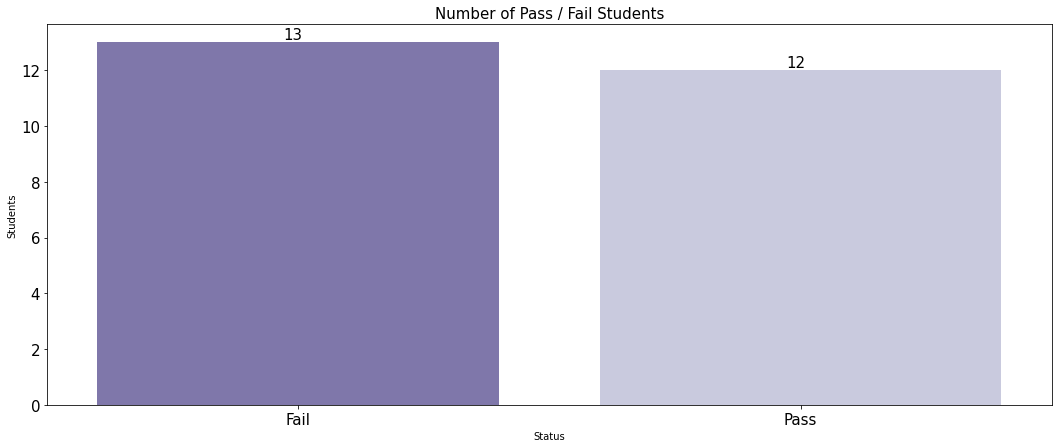

In [249]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Status", y = "Students", data = pass_fail, palette = "Purples_r")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.39, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Number of Pass / Fail Students", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Correlation**

In [250]:
# Pearson Correlation
pearson_coef, p_value = stats.pearsonr(df["Scores"], df["Hours"])
print("Pearson Coefficient: ", pearson_coef)
print("p_value : ", p_value)

Pearson Coefficient:  0.9761906560220887
p_value :  9.132624467459357e-17


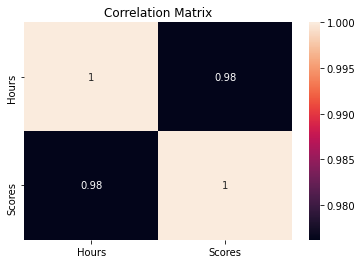

In [251]:
correlation = df.corr()
sns.heatmap(correlation, annot = True)
plt.title("Correlation Matrix")
plt.show()

**Category**

In [252]:
df_group1 = df[["Status", "Hours", "Scores"]]
xy = df_group1.groupby(["Status", "Hours"])
data = xy.first()
data

Scores
Status Hours        
Fail   1.1        17
       1.5        20
       1.9        24
       2.5        21
       2.7        25
       3.2        27
       3.3        42
       3.5        30
       3.8        35
       4.5        41
       5.1        47
Pass   4.8        54
       5.5        60
       5.9        62
       6.1        67
       6.9        76
       7.4        69
       7.7        85
       7.8        86
       8.3        81
       8.5        75
       8.9        95
       9.2        88

In [253]:
# Fail Students
Fail = df[df["Status"] == "Fail"]
del Fail["Status"]
Fail

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
4,3.5,30
5,1.5,20
9,2.7,25
12,4.5,41
13,3.3,42
14,1.1,17
16,2.5,30


In [254]:
# Pass Students
Pass = df[df["Status"] == "Pass"]
del Pass["Status"]
Pass

,Hours,Scores
3,8.5,75
6,9.2,88
7,5.5,60
8,8.3,81
10,7.7,85
11,5.9,62
15,8.9,95
18,6.1,67
19,7.4,69
21,4.8,54


**Scatter Plot**

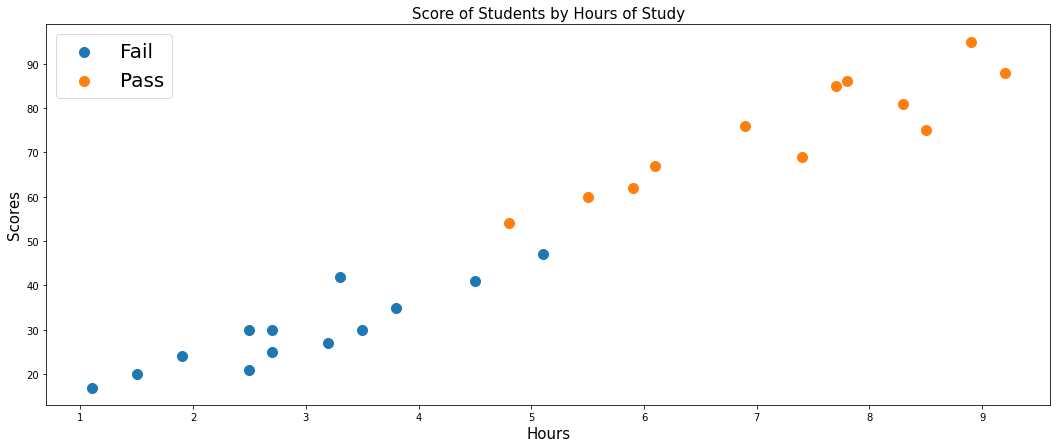

In [255]:
fig, ax = plt.subplots(figsize = (18, 7))
ax.scatter(x = Fail["Hours"], y = Fail["Scores"], s = 100, label = "Fail")
ax.scatter(x = Pass["Hours"], y = Pass["Scores"], s = 100, label = "Pass")
plt.title("Score of Students by Hours of Study", size = 15)
plt.xlabel("Hours", size = 15)
plt.ylabel("Scores", size = 15)
plt.legend(fontsize = 20)
plt.show()

**Regression Plot**

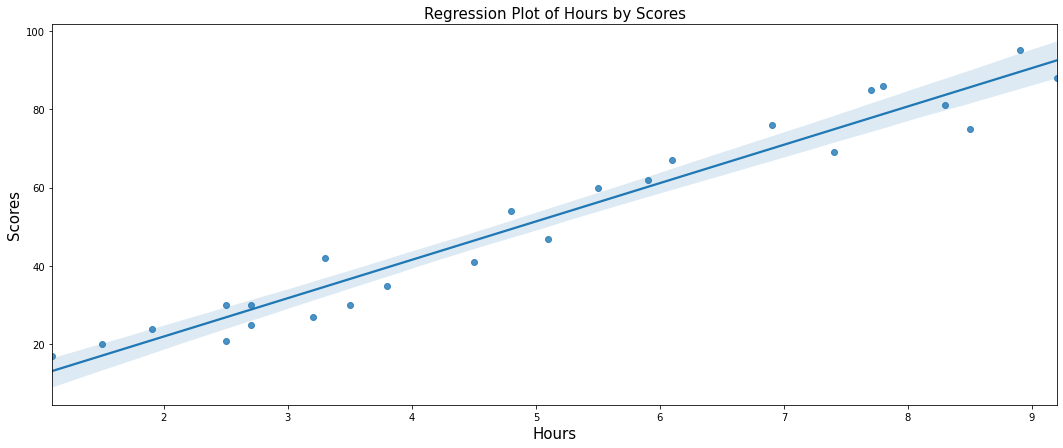

In [256]:
plt.figure(figsize = (18, 7))
sns.regplot(x = "Hours", y = "Scores", data = df)
plt.title("Regression Plot of Hours by Scores", size = 15)
plt.xlabel("Hours", size = 15)
plt.ylabel("Scores", size = 15)
plt.show()

**Linear Reegression: Prediction on Full Data**

In [257]:
X = df[["Hours"]]
y = df["Scores"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

lr.fit(x_train, y_train)
y_predict = lr.predict(X)
print(line)

[26.7864001  52.63476378 33.74557494 86.43647014 36.72807844 16.84472176
 93.39564498 56.61143512 84.44813447 28.77473577 78.48312747 60.58810646
 46.66975678 34.73974277 12.86805043 90.41314147 26.7864001  20.8213931
 62.57644212 75.50062397 28.77473577 49.65226028 39.71058194 70.5297848
 79.4772953 ]


In [258]:
comparison = pd.DataFrame({"Actual": y, "Predicted": y_predict})
comparison

,Actual,Predicted
0,21,26.786400
1,47,52.634764
2,27,33.745575
3,75,86.436470
4,30,36.728078
5,20,16.844722
6,88,93.395645
7,60,56.611435
8,81,84.448134
9,25,28.774736


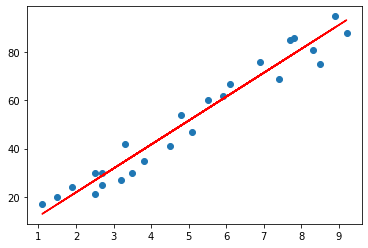

In [259]:
plt.scatter(X, y)
plt.plot(X, y_predict, color = "r")
plt.show()

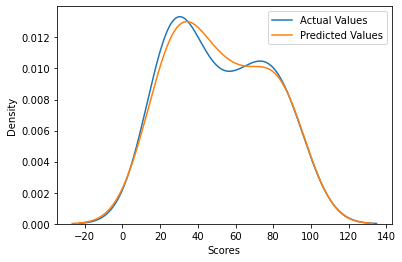

In [260]:
# Actual and Predicted Values Plot
sns.kdeplot(data = X, x = y, label = "Actual Values")
sns.kdeplot(data = X, x = y_predict, label = "Predicted Values")
plt.legend()
plt.show()

In [261]:
# Prediction Score
test_score = lr.score(x_test, y_test)
test_score

0.9367661043365056

**Linear Regression: Prediction on Test Data**

In [262]:
# Prediction
X = df[["Hours"]]
y = df["Scores"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

lr = LinearRegression()
lr.fit(x_train, y_train)

y_predict = lr.predict(x_test)
print(y_predict)

[16.84472176 33.74557494 75.50062397 26.7864001  60.58810646 39.71058194
 20.8213931 ]


In [263]:
# Predicted and Actual Values
comparison = pd.DataFrame({"Actual": y_test, "Predicted": y_predict})
comparison

,Actual,Predicted
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


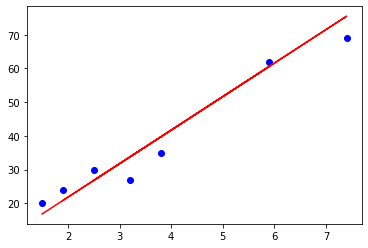

In [264]:
# Scatter Plot of Test Data
plt.scatter(x_test, y_test, color = "blue")
plt.plot(x_test, y_predict, "r")
plt.show()

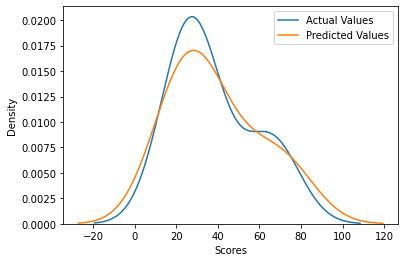

In [265]:
# Actual and Predicted Values Plot
sns.kdeplot(data = x_test, x = y_test, label = "Actual Values")
sns.kdeplot(data = x_test, x = y_predict, label = "Predicted Values")
plt.legend()
plt.show()

In [266]:
# Prediction Score
test_score = lr.score(x_test, y_test)
test_score

0.9367661043365056

**What will be predicted score if a student studies for 9.25 hrs/ day?**

In [267]:
hours = 9.25
prediction = lr.predict([[hours]])
print("No of Hours = " + str(hours))
print("Predicted Score = " + str(prediction[0]))

No of Hours = 9.25
Predicted Score = 93.89272889341652


In [268]:
# Mean Squared Error
mse = metrics.mean_absolute_error(y_test, y_predict)
mse

4.130879918502482